In [1]:
## The following code is how we did all analysis (with the exception of the dpendencies, which are just here so it runs).
## The code is simply copied and pasted for any analysis that needs to be done by changing the array that runs the for loop
##     as well as some minor tweaking for formatting titles and labels.
## First is the NAICS analysis, then the much more generalized poverty analysis.

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from pprint import pprint

# Import csv broadband data to dataframe
broadband_df = pd.read_csv("../CSV_files/clean_broadband.csv")

# Census API Key
from config import census_api_key

In [3]:
# The data is grabbed from the relevant csv
NAICS_2017_csv_paths_df = pd.read_csv("../CSV_files/NAICS_2017_csv_paths.csv")
NAICS_2017_csv_paths_df

,Paths
0,../CSV_files/2017_Utilities_ecnbasic.csv
1,../CSV_files/2017_Information_ecnbasic.csv
2,../CSV_files/2017_Finance and insurance_ecnbas...
3,../CSV_files/2017_Real estate and rental and l...
4,"../CSV_files/2017_Professional, scientific, an..."
5,../CSV_files/2017_Administrative and support a...
6,../CSV_files/2017_Educational services_ecnbasi...
7,../CSV_files/2017_Health care and social assis...
8,"../CSV_files/2017_Arts, entertainment, and rec..."
9,../CSV_files/2017_Accommodation and food servi...


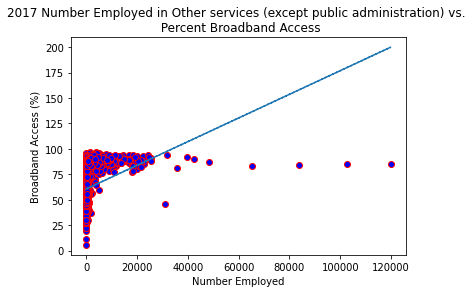

In [4]:
# This section runs a linear regression for all NAICS labels and broadband access

# Empty arrays for r-squared and r-values are initialized
r_squared = []
r_values = []

# for loop looping through all paths created in previous steps analyzes all files based upon number employed vs broadband access
#    for a specific NAICS label.
for path in NAICS_2017_csv_paths_df["Paths"]:
    
    # Clears figure so plots do not superimpose
    plt.clf()
    
    # Dataframe for relevant label is made
    label_df = pd.read_csv(path)
    
    # Lists for x and y values are defined
    x = label_df['Number Employed']
    y = label_df['Broadband (%)']

    # Linear regression is run
    label_slope, label_int, label_r, p, std_err = stats.linregress(x ,y)
    label_fit = label_slope * x + label_int

    # Plot is crafted and labeled then linear regression and r-squared are superimposed
    plt.scatter(x ,y , marker="o", facecolors="blue", edgecolors="red")
    plt.title(f'{label_df["Year"].min()} Number Employed in {label_df["NAICS2017 Label"].min()} vs. \n Percent Broadband Access')
    plt.xlabel("Number Employed")
    plt.ylabel("Broadband Access (%)")
    plt.plot(x , label_fit,"--")

    # Values for r-squared and r-values are appended to the relevant array
    r_squared.append(f'The r-squared for {label_df["NAICS2017 Label"].min()} is {round(label_r**2,3)}.')
    r_values.append(f'The r-value for {label_df["NAICS2017 Label"].min()} is {round(label_r,3)}.')

    # plot is output and saved as a png
    plt.savefig(f'../output_charts/{label_df["Year"].min()}_NAICS_{label_df["NAICS2017 Label"].min()}_lin_regress.png',format='png')

In [5]:
r_squared

['The r-squared for Utilities is 0.044.',
 'The r-squared for Information is 0.055.',
 'The r-squared for Finance and insurance is 0.078.',
 'The r-squared for Real estate and rental and leasing is 0.078.',
 'The r-squared for Professional, scientific, and technical services is 0.078.',
 'The r-squared for Administrative and support and waste management and remediation services is 0.062.',
 'The r-squared for Educational services is 0.065.',
 'The r-squared for Health care and social assistance is 0.144.',
 'The r-squared for Arts, entertainment, and recreation is 0.087.',
 'The r-squared for Accommodation and food services is 0.119.',
 'The r-squared for Other services (except public administration) is 0.115.']

In [6]:
r_values

['The r-value for Utilities is 0.209.',
 'The r-value for Information is 0.235.',
 'The r-value for Finance and insurance is 0.279.',
 'The r-value for Real estate and rental and leasing is 0.28.',
 'The r-value for Professional, scientific, and technical services is 0.28.',
 'The r-value for Administrative and support and waste management and remediation services is 0.248.',
 'The r-value for Educational services is 0.256.',
 'The r-value for Health care and social assistance is 0.38.',
 'The r-value for Arts, entertainment, and recreation is 0.295.',
 'The r-value for Accommodation and food services is 0.344.',
 'The r-value for Other services (except public administration) is 0.339.']

In [7]:
## The poverty analysis has a few fairly unrelated values, so it is a bit more generalized

In [8]:
# The relevant dataframe is grabbed from the csv so it can be run here.
census_2017_acs5_df = pd.read_csv("../CSV_files/census_2017_acs5_df.csv")

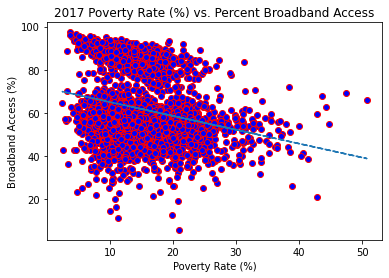

In [9]:
# This section runs a linear regression for all NAICS labels and broadband access

# Array of column headers to be analyzed against broadband access as a percent
headers = ["Population", "Median Age", "Household Income", "Per Capita Income", "Poverty Rate (%)"]

# Arrays to hold r and r-squared values are initilaized
r_squared = []
r_values = []

# for loop looping through each header
for header in headers:

    # Clears figure so plots do not superimpose
    plt.clf()
    
    # Lists for x and y values are defined
    x = census_2017_acs5_df[header]
    y = census_2017_acs5_df['Broadband (%)']

    # Linear regression is run
    header_slope, header_int, header_r, p, std_err = stats.linregress(x ,y)
    header_fit = header_slope * x + header_int

    # Plot is crafted and labeled then linear regression and r-squared is superimposed
    plt.scatter(x ,y , marker="o", facecolors="blue", edgecolors="red")
    plt.title(f'2017 {header} vs. Percent Broadband Access')
    plt.xlabel(header)
    plt.ylabel("Broadband Access (%)")
    plt.plot(x , header_fit,"--")
    
    # r_squared values are appended to relevant lists
    r_squared.append(f'The r-squared for {header} is {round(header_r**2,3)}.')
    r_values.append(f'The r-value for {header} is {round(header_r,3)}.')

    # plot is output and saved as a png
    plt.savefig(f'../output_charts/2017_acs5_{header}_lin_regress.png',format='png')

In [10]:
r_squared

['The r-squared for Population is 0.145.',
 'The r-squared for Median Age is 0.07.',
 'The r-squared for Household Income is 0.204.',
 'The r-squared for Per Capita Income is 0.176.',
 'The r-squared for Poverty Rate (%) is 0.06.']

In [11]:
r_values

['The r-value for Population is 0.381.',
 'The r-value for Median Age is -0.265.',
 'The r-value for Household Income is 0.452.',
 'The r-value for Per Capita Income is 0.419.',
 'The r-value for Poverty Rate (%) is -0.244.']